In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib

os.chdir("../")
from epitools import get_data

In [2]:
gdf_ca = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/canada.geojson")
gdf_ca = gdf_ca.rename(columns={"name": "state"})
gdf_ca["state"] = gdf_ca["state"].replace({"Yukon Territory": "Yukon"})	
df_ca = get_data(
    country="Canada",
    year=2021,
    aggregation="state",
    election="federal"
)
data_ca = pd.merge(gdf_ca, df_ca, on="state")
data_ca["country"] = "Canada"

In [3]:
gdf_mx = gpd.read_file("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")
gdf_mx = gdf_mx.rename(columns={"state_code": "state_id"})

df_mx = get_data(
    country="Mexico",
    year=2018,
    aggregation="state_id",
    election="first_round"
)
df_mx["state_id"] = df_mx["state_id"].astype(int)

data_mx = pd.merge(gdf_mx, df_mx, on="state_id")
data_mx["country"] = "Mexico"

In [4]:
gdf_us = gpd.read_file(f"https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
gdf_us = gdf_us.rename(columns={"name": "state"})
gdf_us["state"] = gdf_us["state"].str.upper()

df_us = get_data(
    country="United States",
    year=2020,
    aggregation="state",
    election="first_round"
)
data_us = pd.merge(gdf_us, df_us, on="state")
data_us["country"] = "United States"

In [5]:
## Peru
gdf_pe = gpd.read_file("https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson")
gdf_pe = gdf_pe.rename(columns={"NOMBDEP": "region"})

df_pe = get_data(
    country="Peru",
    year=2021,
    aggregation="region",
    election="first_round"
)

data_pe = pd.merge(gdf_pe, df_pe, on="region")
data_pe["country"] = "Peru"

In [6]:
## Chile
gdf_cl = gpd.read_file("geo_shapes/Chile/region_id.geojson")
gdf_cl = gdf_cl.rename(columns={"codregion": "region_id"})

df_cl = get_data(
    country="Chile",
    year=2021,
    aggregation="region_id",
    election="first_round"
)
df_cl["region_id"] = df_cl["region_id"].astype(int)

data_cl = pd.merge(gdf_cl, df_cl, on="region_id")
data_cl["country"] = "Chile"

In [7]:
gdf_ar = gpd.read_file("geo_shapes/Argentina_district.geojson")

gdf_ar = gdf_ar.rename(columns={"nombre": "district"})

df_ar = get_data(
    country="Argentina",
    year=2023,
    aggregation="district",
    election="first_round",
)

data_ar = pd.merge(gdf_ar, df_ar, on="district")
data_ar["country"] = "Argentina"

In [8]:
gdf_br = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/brazil-states.geojson")
gdf_br = gdf_br.rename(columns={"sigla": "region_id"})

df_br = get_data(
    country="Brazil",
    year=2022,
    aggregation="region_id",
    election="first_round"
)
data_br = pd.merge(gdf_br, df_br, on="region_id")
data_br["country"] = "Brazil"

In [9]:
output = []

for item in [
    ("France", [2022], "first_round", "nuts_2"),
    ("Italy", [2022], "first_round", "nuts_2"),
    ("Spain", [2019], "general", "nuts_2"),
    ("Germany", [2021], "general", "nuts_2"),
    ("Belgium", [2019], "general", "nuts_2"),
]:
    country, years, election_round, aggregation = item
    print(country)
    for year in years:
        test = get_data(
            aggregation=aggregation,
            country=country,
            election=election_round,
            year=year 
        )
        test["country"] = country

        for col in ["ec", "ep"]:
            test[f"{col}_n"] = (test[col] - test[col].mean()) / test[col].std()

        output.append(test)

data_eu = pd.concat(output, ignore_index=True)
data_eu.head()

France
Italy
Spain
Germany
Belgium


,nuts_2,ec,ep,year,country,ec_n,ep_n
0,FR10,0.693623,0.306406,2022,France,-0.501615,2.519123
1,FRB0,0.817368,0.182996,2022,France,0.758738,-0.044325
2,FRC1,0.814199,0.185293,2022,France,0.726460,0.003393
3,FRC2,0.802589,0.194815,2022,France,0.608212,0.201174
4,FRD1,0.808170,0.172017,2022,France,0.665049,-0.272373


In [10]:
europe = gpd.read_file("geo_shapes/NUTS_RG_20M_2021_3035.shp.zip").to_crs("epsg:4326")
# gdf_europe = europe[europe["LEVL_CODE"] == 2]
gdf_europe = pd.merge(data_eu, europe[["NUTS_ID", "geometry"]], left_on="nuts_2", right_on="NUTS_ID", how="left")

gdf_europe.head()

,nuts_2,ec,ep,year,country,ec_n,ep_n,NUTS_ID,geometry
0,FR10,0.693623,0.306406,2022,France,-0.501615,2.519123,FR10,"POLYGON ((1.70436 49.23220, 1.78842 49.17804, ..."
1,FRB0,0.817368,0.182996,2022,France,0.758738,-0.044325,FRB0,"POLYGON ((1.92215 48.45760, 1.99409 48.28658, ..."
2,FRC1,0.814199,0.185293,2022,France,0.726460,0.003393,FRC1,"POLYGON ((4.29342 47.92567, 4.70423 48.02023, ..."
3,FRC2,0.802589,0.194815,2022,France,0.608212,0.201174,FRC2,"POLYGON ((6.82353 47.81305, 6.84618 47.82294, ..."
4,FRD1,0.808170,0.172017,2022,France,0.665049,-0.272373,FRD1,"POLYGON ((-1.11959 49.32227, -0.95566 49.39005..."


In [11]:
nz = gpd.read_file("geo_shapes/New Zealand/region.geojson").to_crs("epsg:4326")
nz = nz.rename(columns={"name": "region"})
nz["region"] = nz["region"].replace({
    "Manawatu-Wanganui": "Manawatū-Whanganui",
    "Gisborne": "Gisborne and Bay of Plenty",
    "Marlborough": "Marlborough and Canterbury",
    "Nelson": "Nelson and Tasman"
})
df_nz = get_data(
    country="New Zealand",
    year=2023,
    aggregation="region",
    election="general"
)

gdf_nz = pd.merge(nz, df_nz, on="region")
gdf_nz["country"] = "New Zealand"
set(nz["region"]) - set(df_nz["region"])
gdf_nz

,id,region,density,path,geometry,ec,ep,year,country
0,11364,Auckland,0,/world/New Zealand/Auckland,"MULTIPOLYGON (((175.90207 -36.25767, 175.89811...",0.000000,1.000000,2023,New Zealand
1,11350,Bay of Plenty,0,/world/New Zealand/Bay of Plenty,"MULTIPOLYGON (((178.11969 -37.33577, 178.11513...",0.000000,1.000000,2023,New Zealand
2,11355,Canterbury,0,/world/New Zealand/Canterbury,"MULTIPOLYGON (((174.23541 -42.12212, 174.23263...",0.000000,1.000000,2023,New Zealand
3,11351,Gisborne and Bay of Plenty,0,/world/New Zealand/Gisborne,"MULTIPOLYGON (((178.83621 -37.68164, 178.83607...",0.773162,0.172500,2023,New Zealand
4,11352,Hawke's Bay,0,/world/New Zealand/Hawke's Bay,"MULTIPOLYGON (((178.26302 -39.10981, 178.26291...",0.000000,1.000000,2023,New Zealand
5,11361,Manawatū-Whanganui,0,/world/New Zealand/Manawatu-Wanganui,"MULTIPOLYGON (((176.89423 -40.47087, 176.89410...",0.000000,1.000000,2023,New Zealand
6,11359,Marlborough and Canterbury,0,/world/New Zealand/Marlborough,"MULTIPOLYGON (((174.59980 -40.89335, 174.59606...",0.635325,0.074830,2023,New Zealand
7,11360,Nelson and Tasman,0,/world/New Zealand/Nelson,"MULTIPOLYGON (((173.59876 -41.06965, 173.59870...",0.876440,0.123136,2023,New Zealand
8,11363,Northland,0,/world/New Zealand/Northland,"MULTIPOLYGON (((174.99355 -35.48235, 174.99345...",0.000000,1.000000,2023,New Zealand
9,11353,Otago,0,/world/New Zealand/Otago,"MULTIPOLYGON (((171.41611 -44.99279, 171.41488...",0.000000,1.000000,2023,New Zealand


In [12]:
set(df_nz["region"]) - set(nz["region"])

{'Manawatū-Whanganui and Taranaki',
 'Otago and Canterbury',
 'Southland and Otago',
 'Taranaki and Waikato',
 'Wellington and Manawatū-Whanganui',
 'Wellington and the Chatham Islands',
 "Wellington, Manawatū-Whanganui and Hawke's Bay",
 'West Coast and Tasman'}

In [13]:
world = gpd.read_file("geo_shapes/countries.geojson")
world = world[["NAME_EN", "geometry"]].rename(columns={"NAME_EN": "country"})
world = world[~world["country"].isin(["Chile", "Argentina", "Belgium", "New Zealand", "United States of America", "Brazil", "Mexico", "Canada", "Peru", "France", "Spain", "Italy", "Germany", "Antarctica"])]

In [14]:
data = pd.concat([data_us, data_mx, data_ca, data_pe, data_cl, data_br, data_ar, gdf_nz, gdf_europe, world])
data = data[data["state"] != "DISTRICT OF COLUMBIA"]
# data = data[~(data["nuts_2"].fillna("#").str.contains("FRY"))]

output = []
for ii, tmp in data.groupby("country"):
    tmp["ep_n"] = (tmp["ep"] - tmp["ep"].mean()) / tmp["ep"].std()
    tmp["ec_n"] = (tmp["ec"] - tmp["ec"].mean()) / tmp["ec"].std()
    output.append(tmp)

data = pd.concat(output, ignore_index=True)
data = gpd.GeoDataFrame(data)

colors = ["#c85200", "#e48646", "#eeb690", "#a6bbc8", "#6b8ea4", "#366785"]
colors.reverse()

def set_colors(x):
    cutoffs = [-1, -0.5, 0, 0.5, 1, 999]
    for i, cutoff in enumerate(cutoffs):
        if x < cutoff:
            return colors[i]

    return "#DBDBDB"
    
data["color_ep"] = data["ep_n"].apply(set_colors)
data["color_ec"] = data["ec_n"].apply(set_colors)
data[["ep_n", "color_ep"]].dropna().sort_values("ep_n").head()

,ep_n,color_ep
498,-2.512856,#366785
526,-2.298268,#366785
516,-2.239532,#366785
88,-2.193597,#366785
114,-2.112451,#366785


In [15]:
data.shape

(553, 36)

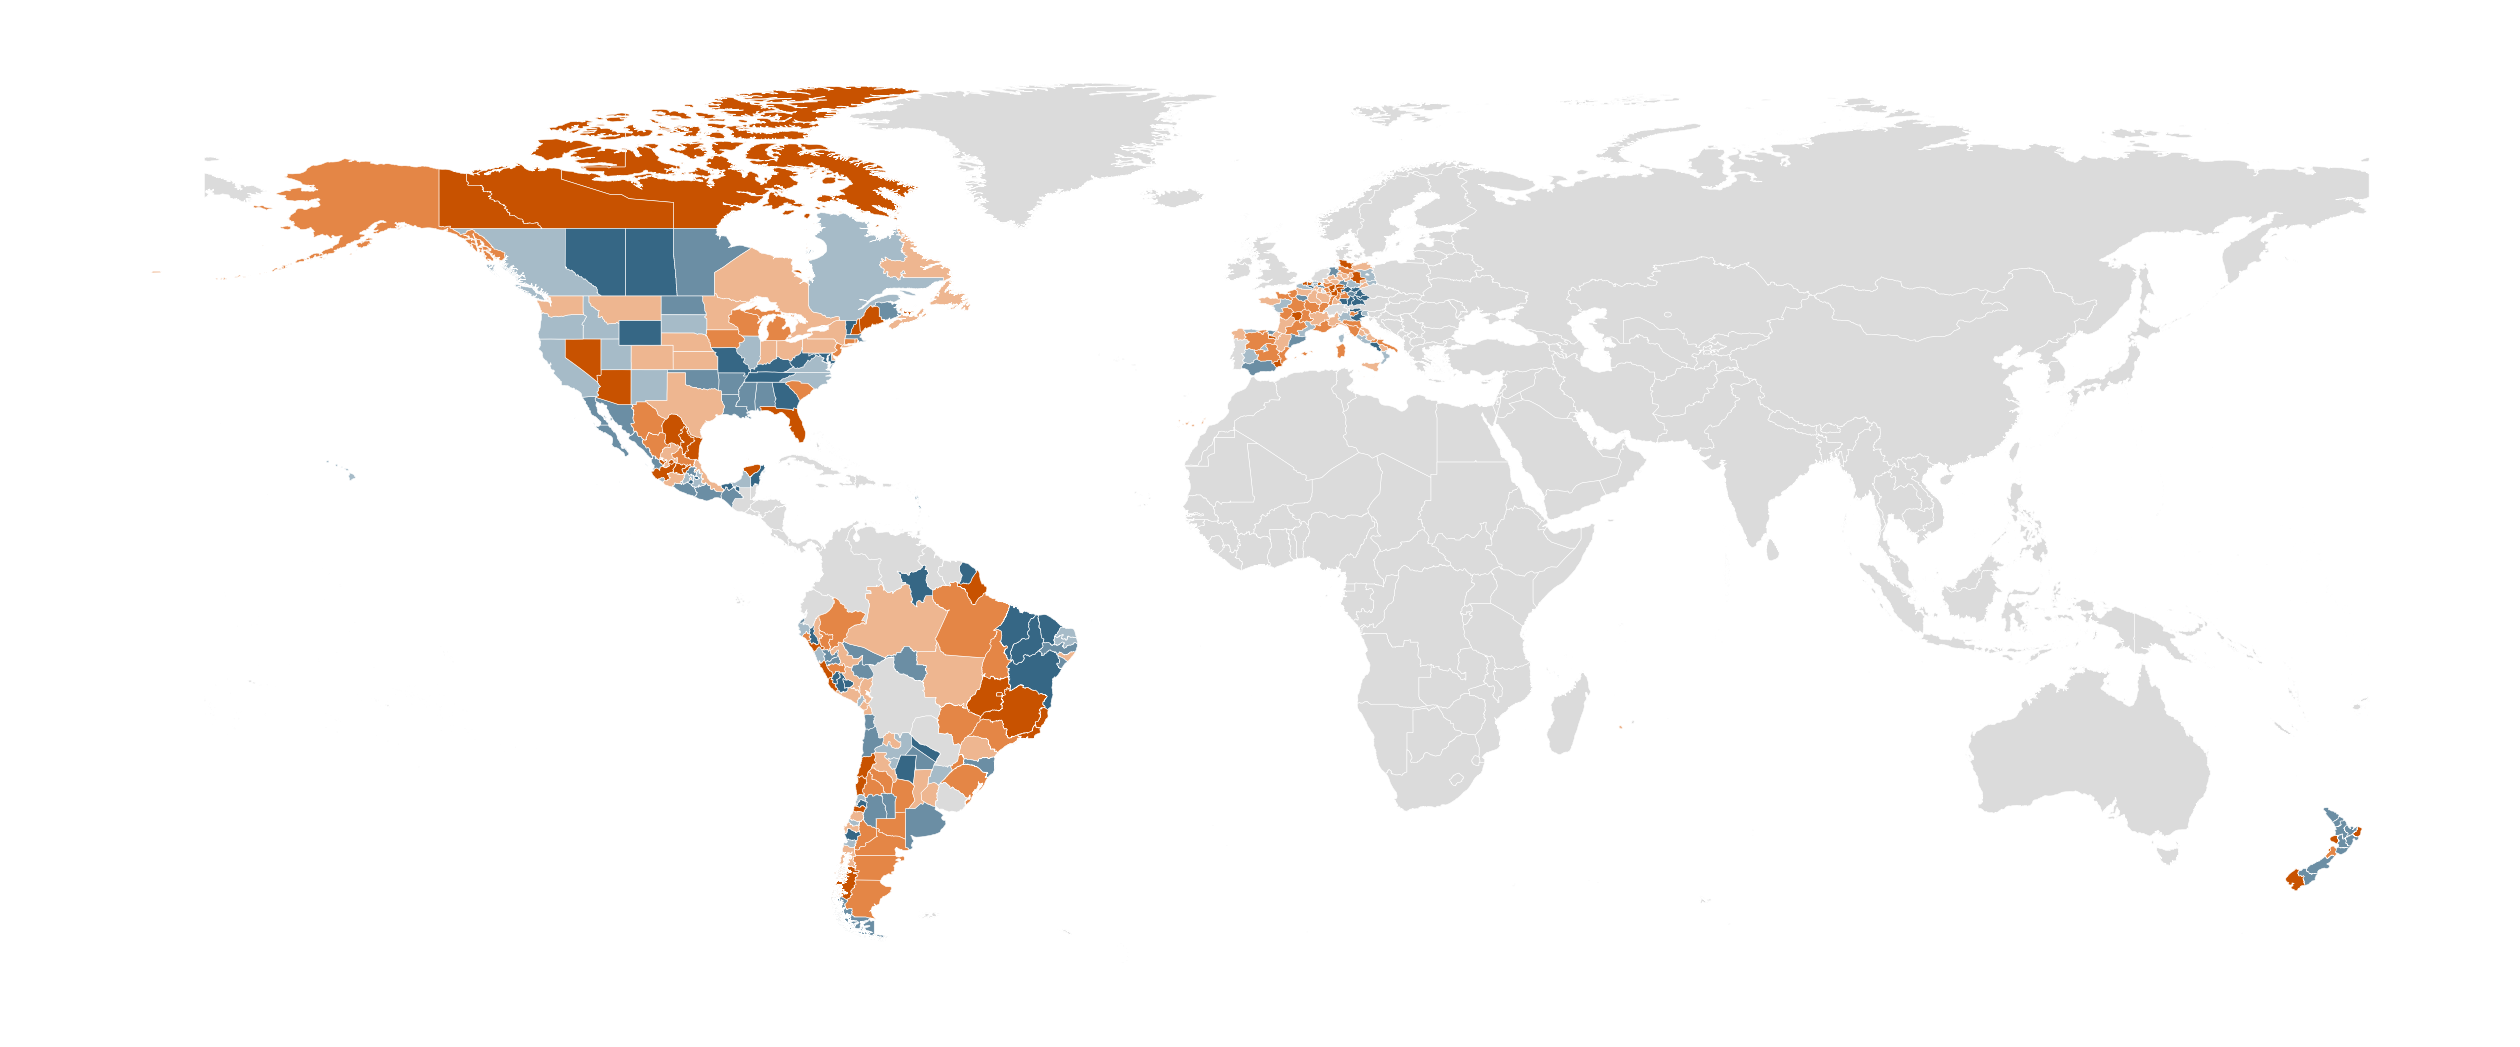

In [16]:

fig, ax = plt.subplots(dpi=400)
norm = plt.Normalize(-2, 2)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

data.plot(
    # column="ep_n",
    color=data["color_ec"],
    legend=False,
    edgecolor="#FFF",
    legend_kwds={
        # "location":"bottom",
        "shrink":.25
    },
    # cmap=cmap,
    # norm=norm,
    # vmin=-2, vmax=2, 
    linewidth=0.1,
    missing_kwds=dict(color="#DBDBDB", label='No Data'),
    ax=ax
)

ax.axis("off")
fig.tight_layout()

In [25]:
data_eu.to_csv("polarization-eu.csv", index=False)

In [54]:
# data_us

In [40]:
dd = pd.read_csv("regions.csv", encoding="latin-1")
dd = pd.merge(data_eu, dd, left_on="nuts_2", right_on="DT")
list(dd)

['nuts_2',
 'ec',
 'ep',
 'year',
 'country',
 'ec_n',
 'ep_n',
 'DT',
 'NAME',
 'emplevel',
 'emplevel2',
 'empgrowth',
 'wagelevel',
 'wagelevel2',
 'wagegrowth',
 'gdplevel',
 'gdplevel2',
 'gdpgrowth',
 'prodlevel',
 'prodlevel2',
 'prodgrowth',
 'Average.DT1',
 'Average.DT2',
 'GERD_PCT_GDP',
 'GVA_IND_SHARE',
 'SHARE_HIGH_EDUC',
 'EQI',
 'ardecoemp',
 'CATG_label',
 'GeoGroup']

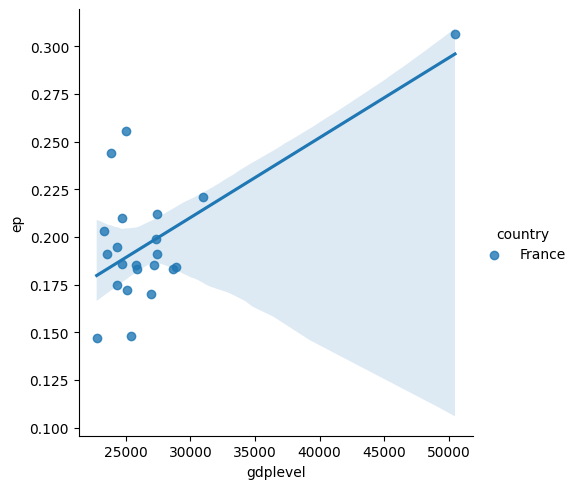

In [51]:
import seaborn as sns
sns.lmplot(x="gdplevel", hue="country", y="ep", data=dd[dd["country"] == "France"])

In [17]:
data.to_file('world.geojson', driver='GeoJSON')

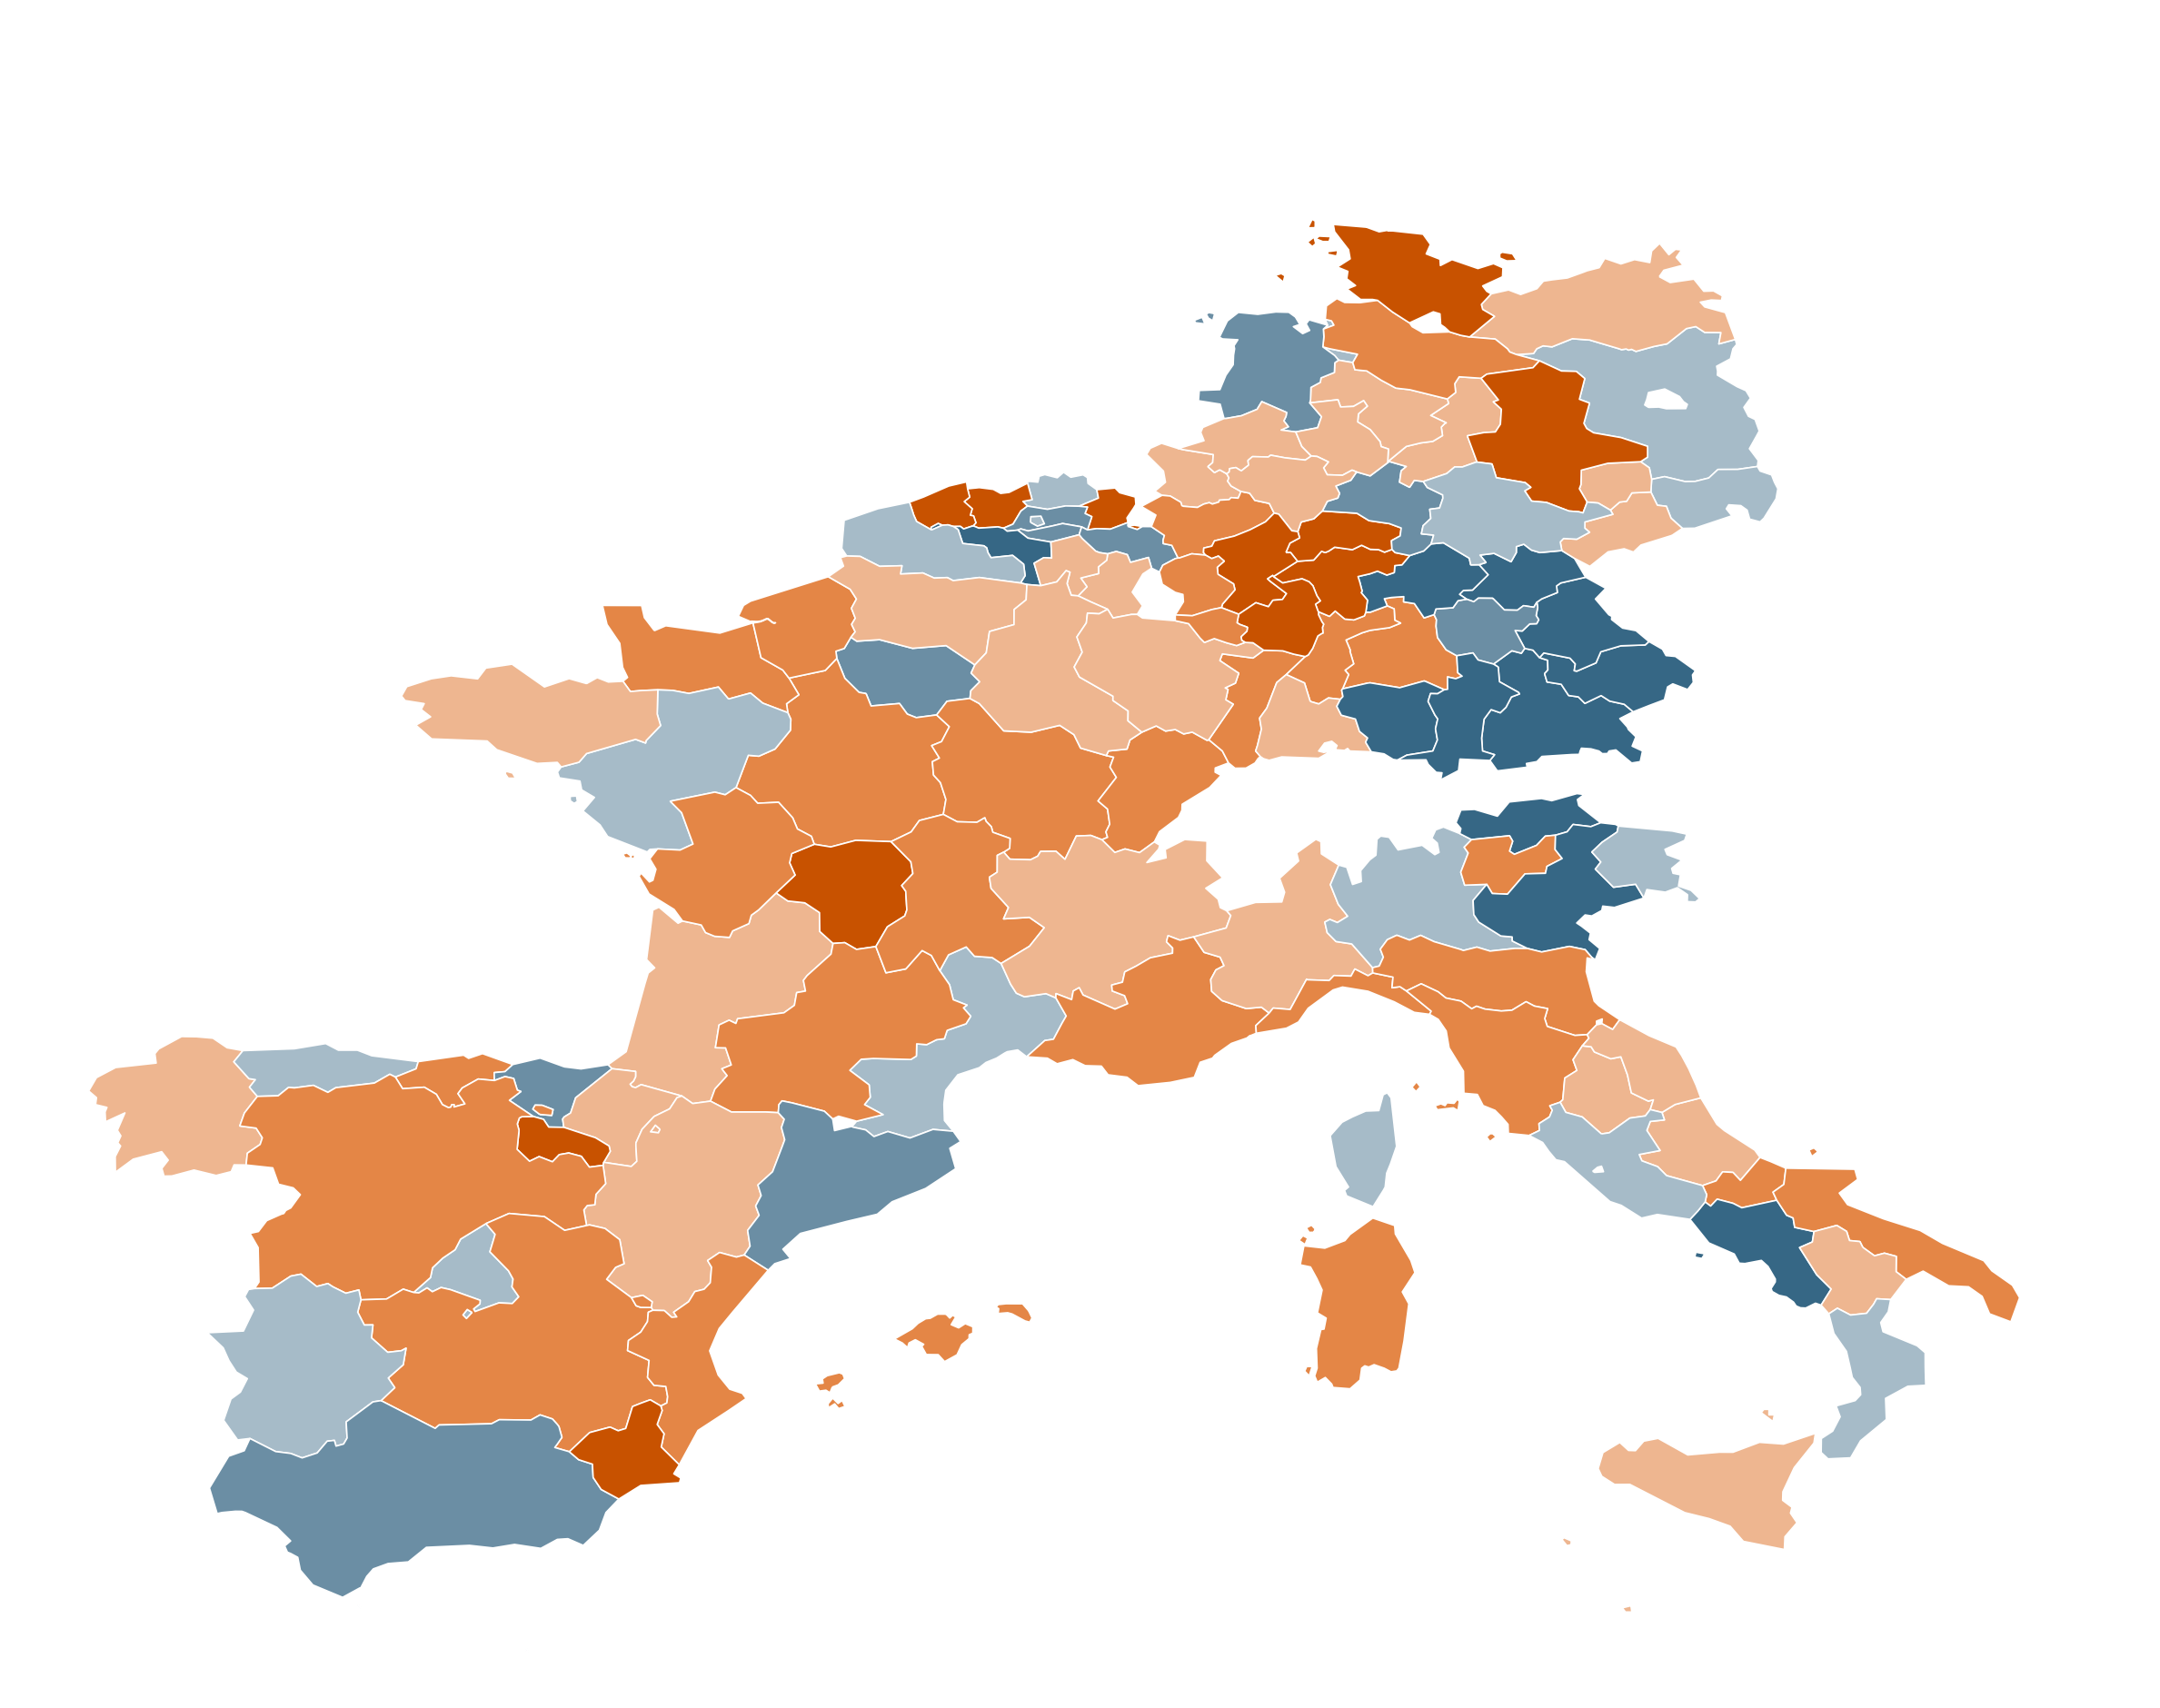

In [18]:
data2 = data[data["country"].isin(["France", "Germany", "Spain", "Italy", "Belgium"])]
fig, ax = plt.subplots(dpi=400)
norm = plt.Normalize(-2, 2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

data2.plot(
    color=data2["color_ec"],
    legend=False,
    edgecolor="#FFFFFF",
    legend_kwds={
        # "location":"bottom",
        "shrink":.25
    },
    # vcenter=0,
    linewidth=0.3,
    missing_kwds=dict(color='#DBDBDB', label='No Data'),
    ax=ax
)

ax.set_xlim(-10, 20)
ax.set_ylim(35, 57.5)

ax.axis("off")
fig.tight_layout()